In [126]:
import scipy.integrate as integrate
import scipy.special as special
import numpy as np
from scipy.integrate import quad
from sympy import * 
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


Implementation 1

In [82]:
def integrand(z, omega_m, omega_k, omega_lambda):
    omega_r = 9.e-5
    func = 1 / np.sqrt(omega_r * (1+z)**4 + omega_m * (1 + z)**3 + omega_k * (1 + z)**2 + omega_lambda)
    return func



# Luminosity distance
def d_L(z, omega_k, omega_m, omega_lambda):
    h = 0.7
    # Hubble distance
    d_H = 3000/h # Mpc

    # Comoving distance
    #d_C = d_H * quad(integrand, 0, x)
    d_C = d_H * quad(integrand, 0, z, args=(omega_m, omega_k, omega_lambda))[0]
    #print(d_C)

    # Transverse comoving distance:
    if omega_k > 0:
        d_M = d_H * (1/np.sqrt(omega_k)) * np.sinh((np.sqrt(omega_k) * d_C) / d_H) 

    if omega_k == 0:
        d_M = d_C

    if omega_k < 0:
        d_M = d_H * (1/np.sqrt(omega_k)) * np.sin((np.sqrt(omega_k) * d_C) / d_H) 


    d_L = (1 + z) * d_M

    return d_L

In [83]:
print(d_L(0.1, 0, 0.3, 0.7))

460.5945306111758


Implementation 2

In [188]:
def d_L(z, o_m, o_l):
    h = 0.7
    # Hubble distance
    #d_H = 3000/h # Mpc
    d_H = 2997.92458/h

    # Comoving distance
    #d_C = lambda omega_m, omega_lambda: d_H/np.sqrt(omega_m * (1 + z)**3 + (1 - omega_m - omega_lambda) * (1 + z)**2 + omega_lambda ) #omega_r * (1+z)**4   omega_r=9.e-5
    d_C = lambda omega_m, omega_lambda, omega_r=9.e-5: d_H/np.sqrt(omega_m * (1 + z)**3 + (1 - omega_m - omega_lambda - omega_r) * (1 + z)**2 + omega_lambda + omega_r * (1+z)**4)    
    #d_C = lambda omega_m, omega_r=9.e-5 : 1/np.sqrt(omega_r * (1+z)**4 + omega_m * (1 + z)**3 + (1 - omega_r - omega_m )  )

    #d_C = np.trapz(d_C(o_m, o_l), z)
    d_C = cumulative_trapezoid(d_C(o_m, o_l), z, initial=0) 

    omega_m = o_m
    omega_lambda = o_l
    omega_r = 9.e-5
    omega_k = 1 - omega_m - omega_lambda - omega_r
    
    print(omega_k)
    # Transverse comoving distance:
    if omega_k > 0:
        d_M = d_H * (1/np.sqrt(omega_k)) * np.sinh((np.sqrt(omega_k) * d_C) / d_H) 

    if omega_k == 0:
        d_M = d_C

    if omega_k < 0:
        d_M = d_H * (1/np.sqrt(omega_k)) * np.sin((np.sqrt(omega_k) * d_C) / d_H) 

    d_L = (1 + z) * d_M
    print(d_L)
    plt.plot(z, d_L)

    return d_L

0.09991000000000003
[0.00000000e+00 8.56721201e-01 1.71361367e+00 ... 1.27037312e+04
 1.27052237e+04 1.27067163e+04]


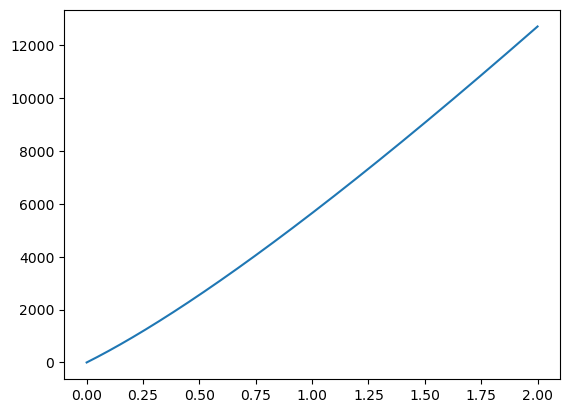

In [189]:
z = np.linspace(0, 2, 10000)
dl = d_L(z, 0.6, 0.3)

In [187]:
func_dl= interp1d(z, dl)
func_dl(0.9)

array(5001.0979069)

## From Chat with Felipe

In [41]:
import numpy as np 
from scipy.integrate import cumulative_trapezoid

In [57]:
z = np.linspace(0, 2, 10000)
integr = lambda Om: 1/np.sqrt (Om*(1+z)**3 + (1-Om) )

integr = lambda Om, Or=9.e-5: 1/np.sqrt(Om*(1+z)**3 + (1-Om -Or) + Or*(1+z)**4 )
print(integr)

<function <lambda> at 0x128fd91c0>


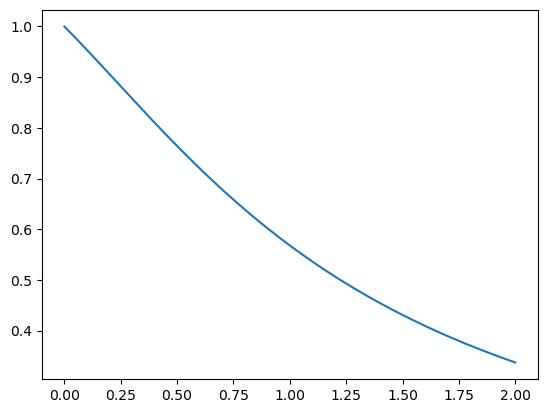

In [43]:
plt.plot(z, integr(0.3))

In [49]:
dl = np.trapz(integr(0.3), z)
h=0.7
dl * 2997.92458/h *(1+z[-1])

15536.89537643766

In [50]:
# 0_k = 1 - 0_m - 0_l - 0_rad

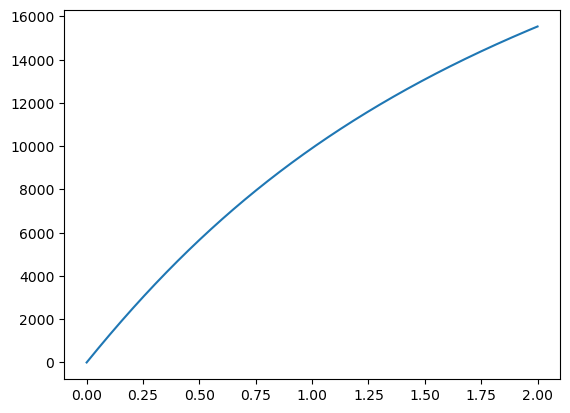

In [47]:
dlz = cumulative_trapezoid(integr(0.3), z, initial=0) * 2997.92458/h *(1+z[-1])

plt.plot(z, dlz)

In [48]:
func_dl= interp1d(z, dlz)
func_dl(0.3)

array(3583.08709486)